In [1]:
from kika.endf.read_endf import read_endf
from kika.utils import configure_endf_debug_logging
from kika.cov.mf34cov_heatmap import plot_mf34_uncertainties, plot_mf34_covariance_heatmap
import logging
from kika.cov.multigroup.mg_mf34_covmat import MGMF34CovMat
from kika.cov.multigroup.MF34_to_MG import MF34_to_MG
from kika.energy_grids import SCALE56
import pandas as pd
import numpy as np

# === DEBUG LOGGING SETUP ===
modules = [
    'kika.endf.parsers.parse_mf34',
    ]
configure_endf_debug_logging(enable=True, level=logging.DEBUG, modules=modules)

<RootLogger root (WARNING)>

In [2]:
#jendl_Fe56 = '/share_snc/snc/JuanMonleon/n-26056_jendl.txt'
#jendl_endf = read_endf(jendl_Fe56)

In [3]:
jeff_Fe56 = '/share_snc/snc/JuanMonleon/jeff40_with_MF4_from_jeff33/26-Fe-56g.txt'
jeff_endf = read_endf(jeff_Fe56)

cov = jeff_endf.mf[34].to_ang_covmat()

/home/MONLEON-JUAN/KIKA/kika/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


[DEBUG] kika.endf.parsers.parse_mf34: Parsing MF34 with 339 lines
[DEBUG] kika.endf.parsers.parse_mf34: Found MT sections: [2]
[DEBUG] kika.endf.parsers.parse_mf34: Parsing MT2 with 339 lines
[DEBUG] kika.endf.parsers.parse_mf34: Parsing MF34 MT2 with ZA=26056, AWR=55.4544, LTT=1, NMT1=1
[DEBUG] kika.endf.parsers.parse_mf34: Parsing subsection 1/1 with MAT1=0, MT1=2, NL=6, NL1=6
[DEBUG] kika.endf.parsers.parse_mf34: Processing 21 sub-subsections for this subsection
[DEBUG] kika.endf.parsers.parse_mf34: Parsing sub-subsection 1/21 with L=1, L1=1, LCT=0, NI=3
[DEBUG] kika.endf.parsers.parse_mf34: Parsing LIST record 1/3 with LS=1, LB=5, NT=66, NE=11
[DEBUG] kika.endf.parsers.parse_mf34: LB=5 processing: LS=1, NE=11
[DEBUG] kika.endf.parsers.parse_mf34: LB=5 symmetric matrix: 10x10, upper triangle = 55 elements
[DEBUG] kika.endf.parsers.parse_mf34: LB=5 total values to read: 11 (energies) + 55 (matrix) = 66
[DEBUG] kika.endf.parsers.parse_mf34: LB=5 read 66 total values
[DEBUG] kika.endf.

In [4]:
cov.summary()

,isotope_row,MT_row,L_row,isotope_col,MT_col,L_col,NE,is_relative,frame
0,26056,2,1,26056,2,1,43,True,same-as-MF4
1,26056,2,1,26056,2,2,16,True,same-as-MF4
2,26056,2,1,26056,2,3,16,True,same-as-MF4
3,26056,2,1,26056,2,4,16,True,same-as-MF4
4,26056,2,1,26056,2,5,13,True,same-as-MF4
5,26056,2,1,26056,2,6,13,True,same-as-MF4
6,26056,2,2,26056,2,2,43,True,same-as-MF4
7,26056,2,2,26056,2,3,16,True,same-as-MF4
8,26056,2,2,26056,2,4,16,True,same-as-MF4
9,26056,2,2,26056,2,5,13,True,same-as-MF4


In [5]:
print(cov.describe(1))

Matrix 1:
  Reaction: 26056 MT2 (L=1) ↔ 26056 MT2 (L=2)
  Shape: (15, 15), Energy grid: 16 points (15 intervals)
  Type: Relative
  Reference frame: same-as-MF4


In [6]:
cov.to_dataframe()   

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.09072, 0.01232, 0.01232, 0.01232, 0.01232,..."
1,26056,2,1,26056,2,2,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,26056,2,1,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,26056,2,1,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,26056,2,1,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,26056,2,1,26056,2,6,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,26056,2,2,26056,2,2,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.07785, 0.006561, 0.006561, 0.006561, 0.006..."
7,26056,2,2,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,26056,2,2,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,26056,2,2,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [7]:
#cov = jendl_endf.mf[34].to_ang_covmat()

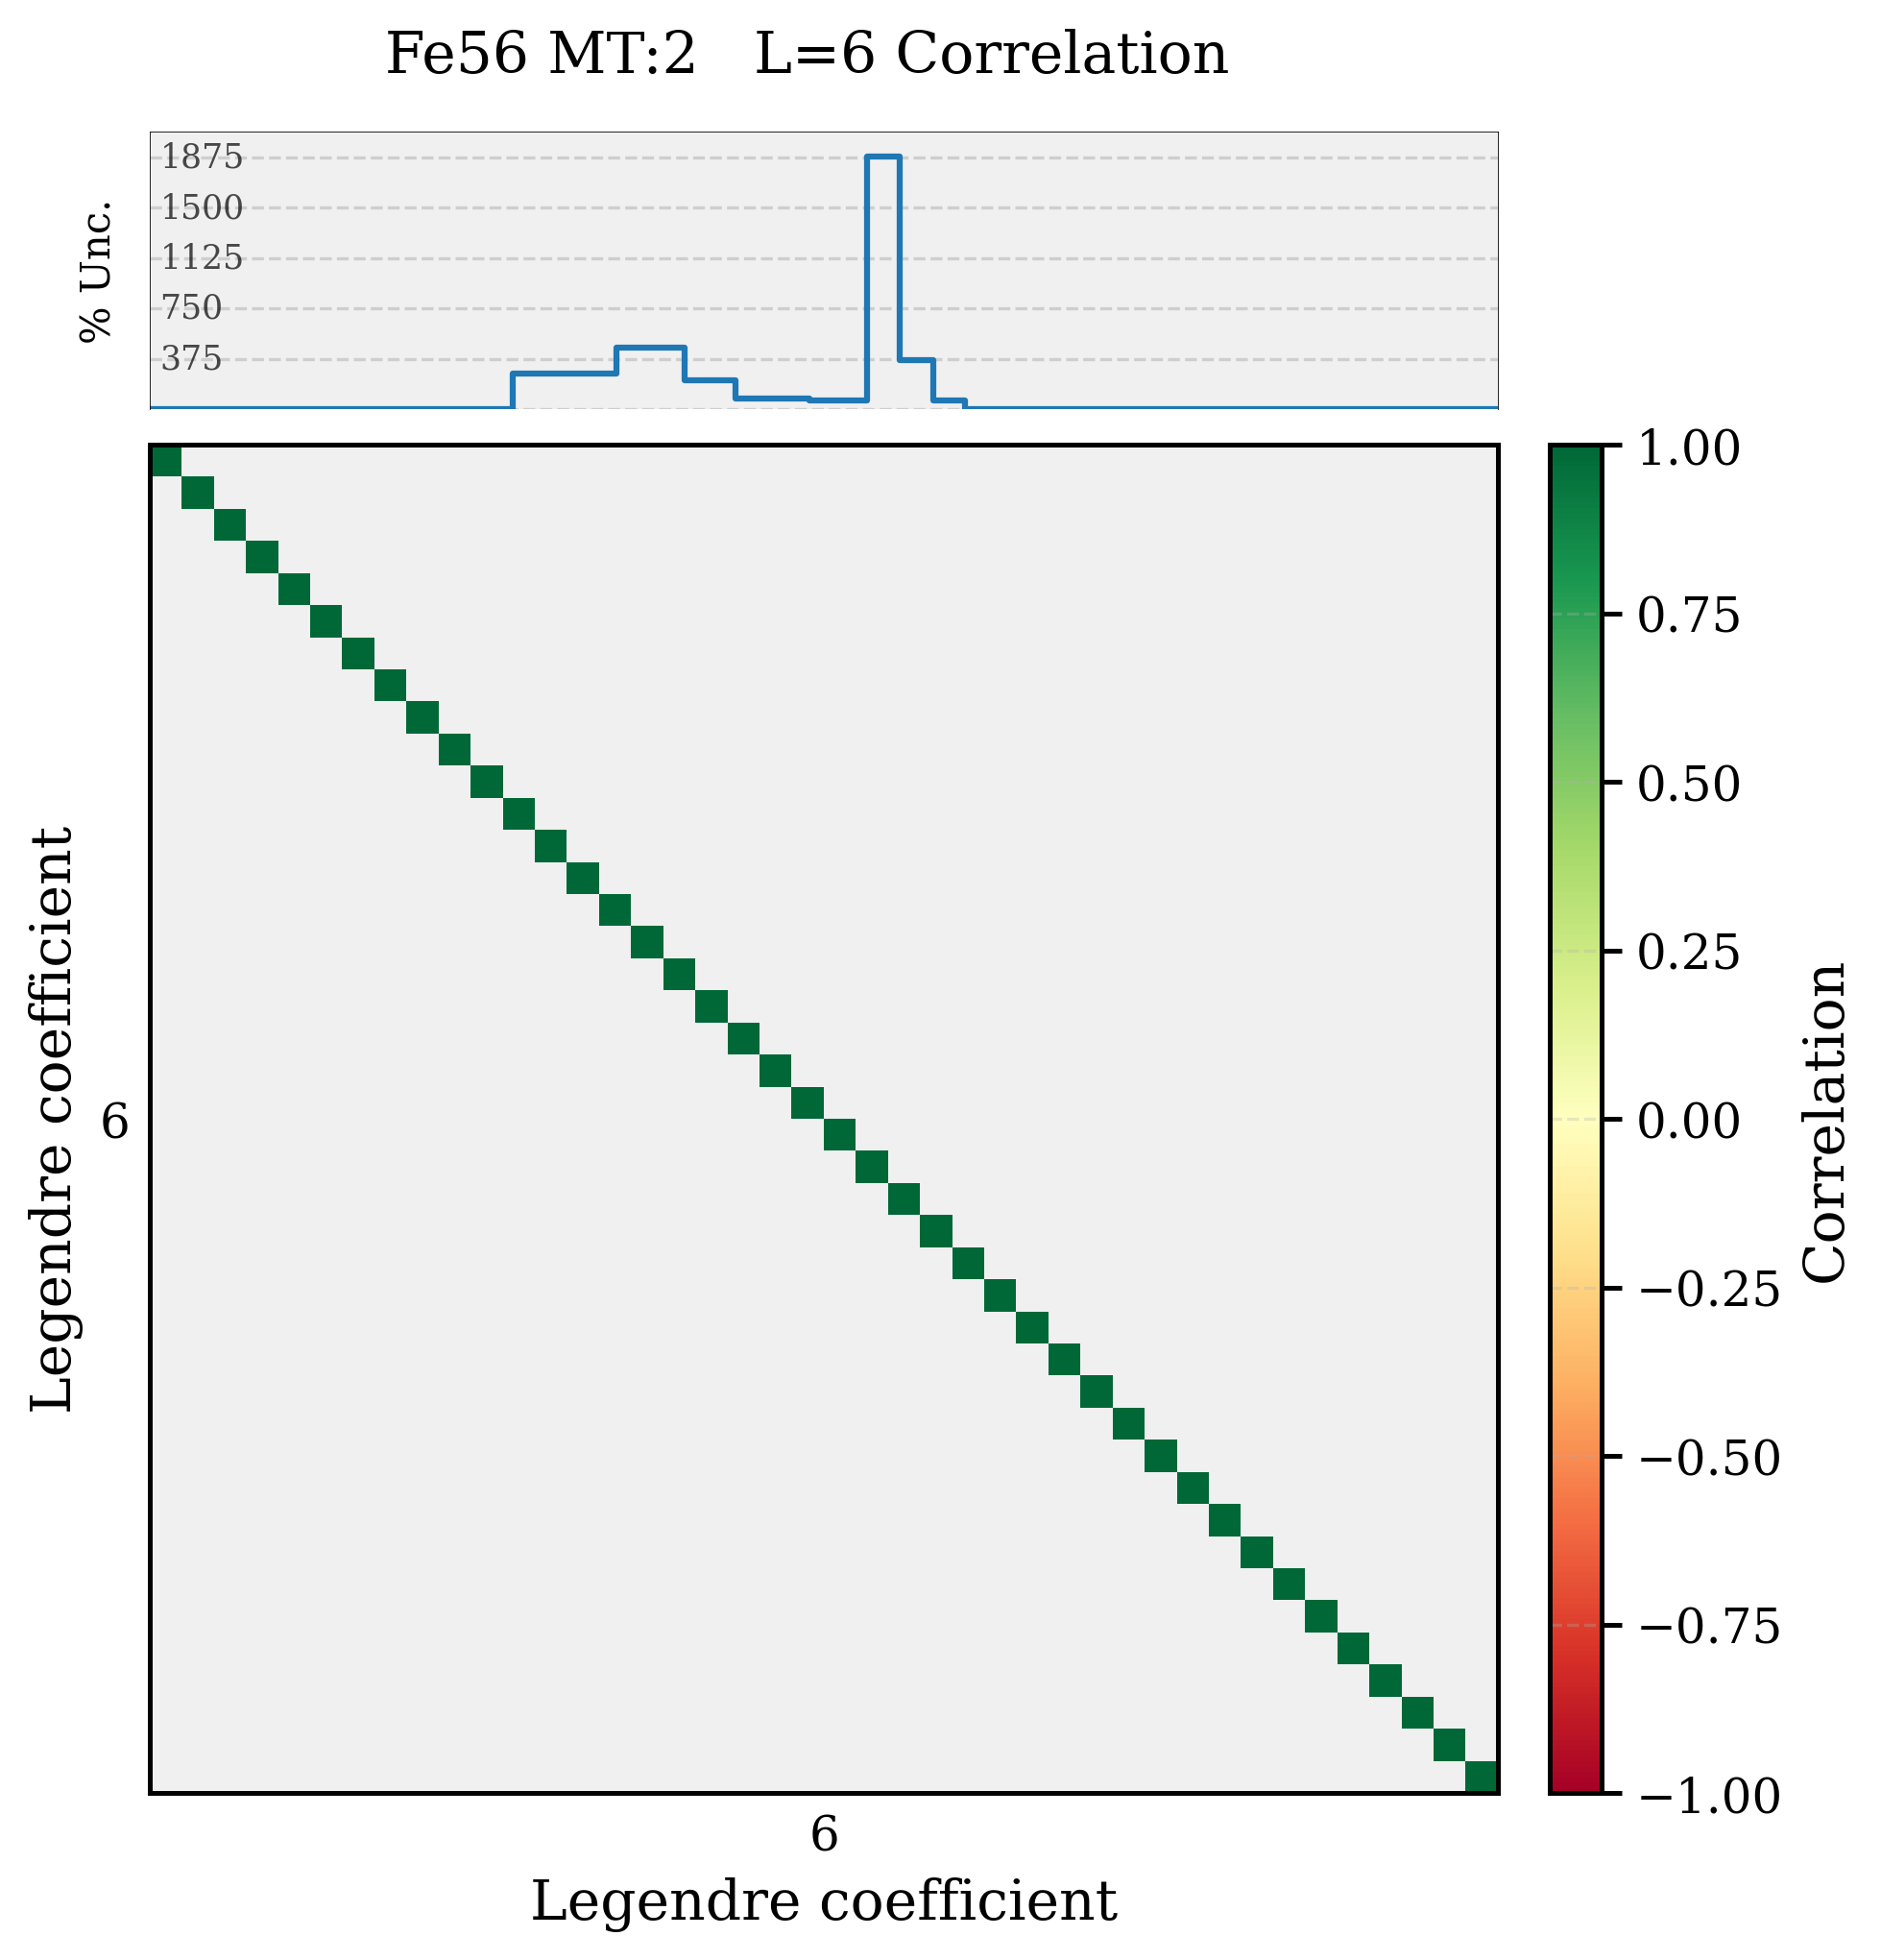

In [16]:
cov.plot_covariance_heatmap(
    isotope=26056,
    mt=2,
    legendre_coeffs=[6],
    matrix_type="corr",
    show_uncertainties=True
)


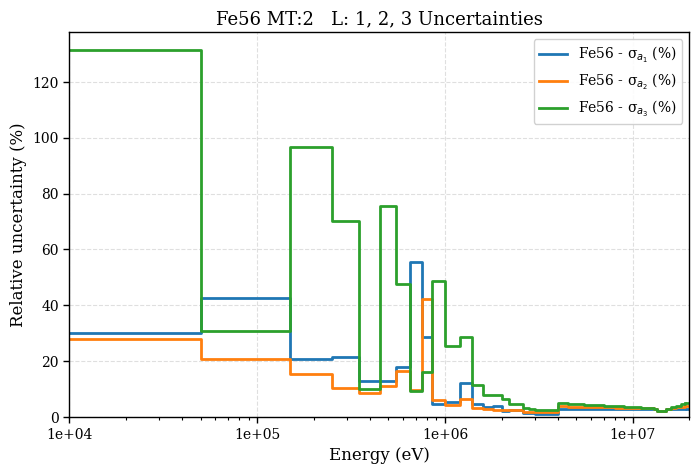

In [33]:
cov.plot_uncertainties(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1,2,3],
    energy_range=(1e4, 2e7),
);


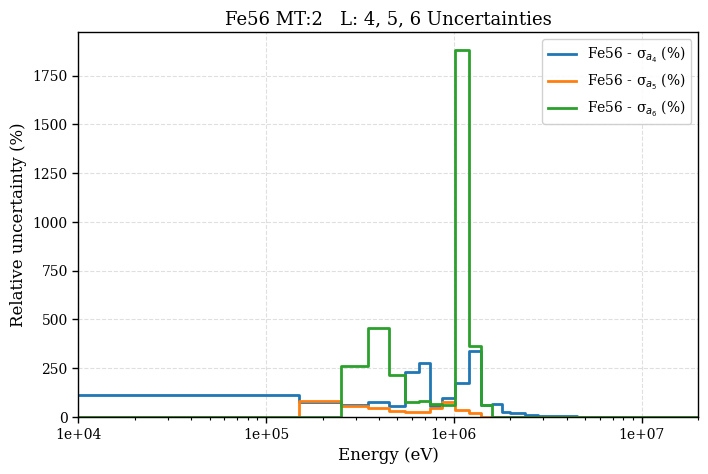

In [36]:
cov.plot_uncertainties(
    isotope=26056,
    mt=2,
    legendre_coeffs=[4,5,6],
    energy_range=(1e4, 2e7),
);

In [19]:
# Let's examine the raw uncertainty data for L=6
uncertainties_L6 = cov.get_uncertainties_for_legendre_coefficient(26056, 2, 6)
print("Uncertainties for L=6:")

if uncertainties_L6:
    energies = uncertainties_L6['energies']
    uncertainties = uncertainties_L6['uncertainties']
    
    print(f"Number of energy points: {len(energies)}")
    print(f"Number of uncertainty values: {len(uncertainties)}")
    
    # Convert to percentage and find max
    uncertainties_percent = uncertainties * 100
    max_uncertainty = np.max(uncertainties_percent)
    max_idx = np.argmax(uncertainties_percent)
    
    print(f"Max uncertainty: {max_uncertainty:.2f}% at index {max_idx}")
    print(f"Max uncertainty energy: {energies[max_idx]:.2e} eV")
    
    print(f"\nAll values:")
    for i, (e, u) in enumerate(zip(energies, uncertainties_percent)):
        marker = " <-- MAX" if i == max_idx else ""
        print(f"  [{i}] Energy: {e:.2e} eV, Uncertainty: {u:.2f}%{marker}")
        
    # Check if this matches what we see in the plot (should be ~1875%)
    print(f"\nDoes this match the plot? Max = {max_uncertainty:.0f}% (expecting ~1875%)")
else:
    print("No uncertainties found for L=6")

Uncertainties for L=6:
Number of energy points: 12
Number of uncertainty values: 12
Max uncertainty: 1878.83% at index 8
Max uncertainty energy: 2.90e+06 eV

All values:
  [0] Energy: 7.00e+05 eV, Uncertainty: 0.00%
  [1] Energy: 1.50e+06 eV, Uncertainty: 263.86%
  [2] Energy: 1.70e+06 eV, Uncertainty: 454.75%
  [3] Energy: 1.90e+06 eV, Uncertainty: 213.45%
  [4] Energy: 2.10e+06 eV, Uncertainty: 79.24%
  [5] Energy: 2.30e+06 eV, Uncertainty: 80.93%
  [6] Energy: 2.50e+06 eV, Uncertainty: 66.56%
  [7] Energy: 2.70e+06 eV, Uncertainty: 61.73%
  [8] Energy: 2.90e+06 eV, Uncertainty: 1878.83% <-- MAX
  [9] Energy: 3.25e+06 eV, Uncertainty: 362.49%
  [10] Energy: 3.75e+06 eV, Uncertainty: 63.85%
  [11] Energy: 1.20e+07 eV, Uncertainty: 0.00%

Does this match the plot? Max = 1879% (expecting ~1875%)


In [20]:
# Let's look at the raw matrices for L=6
print("Looking for L=6 matrices...")
print(f"Number of matrices: {cov.num_matrices}")

# Find matrices related to L=6
for i in range(cov.num_matrices):
    l_row = cov.l_rows[i]
    l_col = cov.l_cols[i]
    if l_row == 6 and l_col == 6:  # Diagonal block for L=6
        print(f"\nFound L=6 diagonal matrix at index {i}:")
        print(f"  Matrix shape: {cov.matrices[i].shape}")
        print(f"  Energy grid length: {len(cov.energy_grids[i])}")
        print(f"  Is relative: {cov.is_relative[i]}")
        
        # Get the diagonal elements (these give the variances)
        matrix = cov.matrices[i]
        diagonal = np.diag(matrix)
        print(f"  Diagonal elements (variances): {diagonal}")
        
        # Convert to standard deviations (uncertainties)
        uncertainties_raw = np.sqrt(np.abs(diagonal))
        print(f"  Standard deviations: {uncertainties_raw}")
        
        # Convert to percentages if relative
        if cov.is_relative[i]:
            uncertainties_pct = uncertainties_raw * 100
            print(f"  As percentages: {uncertainties_pct}")
            
            max_val = np.max(uncertainties_pct)
            max_idx = np.argmax(uncertainties_pct)
            print(f"  Maximum: {max_val:.2f}% at index {max_idx}")
            
            # Check the energy at this index
            energy_grid = cov.energy_grids[i]
            # Note: energy grid has one more point than matrix dimension
            print(f"  Energy grid: {energy_grid}")
            print(f"  Matrix covers energy intervals from {energy_grid[:-1]} to {energy_grid[1:]}")
            
            if max_idx < len(energy_grid) - 1:
                energy_interval = f"{energy_grid[max_idx]:.2e} - {energy_grid[max_idx+1]:.2e} eV"
                print(f"  Maximum uncertainty in energy interval: {energy_interval}")
        
        break
else:
    print("No L=6 diagonal matrix found!")

Looking for L=6 matrices...
Number of matrices: 21

Found L=6 diagonal matrix at index 20:
  Matrix shape: (12, 12)
  Energy grid length: 13
  Is relative: True
  Diagonal elements (variances): [  0.       6.962   20.68     4.556    0.6279   0.6549   0.443    0.381
 353.      13.14     0.4077   0.    ]
  Standard deviations: [ 0.          2.63856021  4.5475268   2.13447886  0.79240141  0.80925892
  0.66558245  0.61725197 18.78829423  3.62491379  0.6385139   0.        ]
  As percentages: [   0.          263.85602134  454.75268004  213.44788591   79.24014134
   80.92589202   66.55824517   61.72519745 1878.82942281  362.49137921
   63.85138996    0.        ]
  Maximum: 1878.83% at index 8
  Energy grid: [1e-05, 1400000, 1600000, 1800000, 2000000, 2200000, 2400000, 2600000, 2800000, 3000000, 3500000, 4000000, 20000000]
  Matrix covers energy intervals from [1e-05, 1400000, 1600000, 1800000, 2000000, 2200000, 2400000, 2600000, 2800000, 3000000, 3500000, 4000000] to [1400000, 1600000, 180000

In [23]:
# Let's trace back to the original ENDF MF34 data
print("Examining original MF34 data...")

# Look at the MF34 section directly
mf34 = jeff_endf.mf[34]
mt2 = mf34.sections[2]
print(f"MT=2 has {len(mt2.subsections)} subsections")

# Look through subsections for data relevant to L=6
for i, subsection in enumerate(mt2.subsections):
    print(f"\nSubsection {i}: MT1={subsection.mt1}, NL={subsection.nl}, NL1={subsection.nl1}")
    print(f"  Number of sub-subsections: {len(subsection.sub_subsections)}")
    
    # Look through sub-subsections
    for j, sub_subsection in enumerate(subsection.sub_subsections):
        l = sub_subsection.l
        l1 = sub_subsection.l1
        
        print(f"  Sub-subsection {j}: L={l}, L1={l1}, NI={sub_subsection.ni}")
        
        if l == 6 and l1 == 6:  # Found the L=6, L1=6 data
            print(f"    *** Found L=6, L1=6 data! ***")
            print(f"    LCT={sub_subsection.lct}, NI={sub_subsection.ni}")
            
            # Look at the records in this sub-subsection
            for k, record in enumerate(sub_subsection.records):
                print(f"      Record {k}: LB={record.lb}, NT={record.nt}")
                
                if hasattr(record, 'matrix') and record.matrix:
                    print(f"        Matrix values (first 10): {record.matrix[:10]}...")
                    print(f"        Matrix length: {len(record.matrix)}")
                    
                    # For LB=5, the matrix should be symmetric or asymmetric
                    if record.lb == 5:
                        ne = record.ne
                        ls = record.ls
                        print(f"        NE={ne}, LS={ls} (LS: 0=asymmetric, 1=symmetric)")
                        
                        # Calculate matrix dimension
                        m = ne - 1  # Number of intervals
                        print(f"        Matrix dimension should be {m}x{m}")
                        
                        # The values are stored as a 1D array, need to reshape
                        matrix_1d = record.matrix
                        
                        if ls == 1:  # Symmetric matrix - lower triangle stored
                            print(f"        Symmetric matrix - {len(matrix_1d)} elements stored")
                            # Reconstruct the symmetric matrix
                            full_matrix = np.zeros((m, m))
                            idx = 0
                            for row in range(m):
                                for col in range(row + 1):
                                    if idx < len(matrix_1d):
                                        full_matrix[row, col] = matrix_1d[idx]
                                        full_matrix[col, row] = matrix_1d[idx]  # Symmetric
                                        idx += 1
                                        
                            print(f"        Full matrix diagonal: {np.diag(full_matrix)}")
                            if 8 < len(np.diag(full_matrix)):
                                print(f"        Element [8,8] = {full_matrix[8,8]} (this should be our 353.0!)")
                            
                        elif ls == 0:  # Asymmetric matrix - full matrix stored
                            print(f"        Asymmetric matrix - {len(matrix_1d)} elements stored")
                            # Reshape to square matrix
                            if len(matrix_1d) == m * m:
                                full_matrix = np.array(matrix_1d).reshape(m, m)
                                print(f"        Full matrix diagonal: {np.diag(full_matrix)}")
                                if 8 < len(np.diag(full_matrix)):
                                    print(f"        Element [8,8] = {full_matrix[8,8]} (this should be our 353.0!)")
                            else:
                                print(f"        Matrix size mismatch: got {len(matrix_1d)}, expected {m*m}")
                
                elif hasattr(record, 'energies') and record.energies:
                    print(f"        Energy grid: {record.energies}")
                    
                # Show all attributes of the record
                record_attrs = [attr for attr in dir(record) if not attr.startswith('_') and hasattr(record, attr) and getattr(record, attr) is not None]
                print(f"        Record attributes: {record_attrs}")

Examining original MF34 data...
MT=2 has 1 subsections

Subsection 0: MT1=2, NL=6, NL1=6
  Number of sub-subsections: 21
  Sub-subsection 0: L=1, L1=1, NI=3
  Sub-subsection 1: L=1, L1=2, NI=1
  Sub-subsection 2: L=1, L1=3, NI=1
  Sub-subsection 3: L=1, L1=4, NI=1
  Sub-subsection 4: L=1, L1=5, NI=1
  Sub-subsection 5: L=1, L1=6, NI=1
  Sub-subsection 6: L=2, L1=2, NI=3
  Sub-subsection 7: L=2, L1=3, NI=1
  Sub-subsection 8: L=2, L1=4, NI=1
  Sub-subsection 9: L=2, L1=5, NI=1
  Sub-subsection 10: L=2, L1=6, NI=1
  Sub-subsection 11: L=3, L1=3, NI=3
  Sub-subsection 12: L=3, L1=4, NI=1
  Sub-subsection 13: L=3, L1=5, NI=1
  Sub-subsection 14: L=3, L1=6, NI=1
  Sub-subsection 15: L=4, L1=4, NI=2
  Sub-subsection 16: L=4, L1=5, NI=1
  Sub-subsection 17: L=4, L1=6, NI=1
  Sub-subsection 18: L=5, L1=5, NI=1
  Sub-subsection 19: L=5, L1=6, NI=1
  Sub-subsection 20: L=6, L1=6, NI=1
    *** Found L=6, L1=6 data! ***
    LCT=0, NI=1
      Record 0: LB=1, NT=26
        Record attributes: ['col_e

In [24]:
# Let's examine the L=6, L1=6 record in detail
mf34 = jeff_endf.mf[34]
mt2 = mf34.sections[2]
subsection = mt2.subsections[0]

# Find the L=6, L1=6 sub-subsection (should be index 20)
l6_subsection = subsection.sub_subsections[20]
print(f"L=6, L1=6 sub-subsection: L={l6_subsection.l}, L1={l6_subsection.l1}")
print(f"Number of records: {len(l6_subsection.records)}")

# Examine the record
record = l6_subsection.records[0]
print(f"\nRecord details:")
print(f"  LB={record.lb}, NT={record.nt}")

# Check what type of data this is
if record.lb == 1:
    print("  LB=1: Non-absolute covariance matrix or table")
    if hasattr(record, 'e_table_k') and record.e_table_k:
        print(f"  E_table_k (energies): {record.e_table_k}")
        print(f"  F_table_k (values): {record.f_table_k}")
        if hasattr(record, 'e_table_l') and record.e_table_l:
            print(f"  E_table_l (energies): {record.e_table_l}")
            print(f"  F_table_l (values): {record.f_table_l}")
    
    # Check other attributes
    print(f"  NP: {getattr(record, 'np', 'N/A')}")
    print(f"  LT: {getattr(record, 'lt', 'N/A')}")
    
    # Show the raw list values
    if hasattr(record, 'raw_list_values') and record.raw_list_values:
        print(f"  Raw list values (first 20): {record.raw_list_values[:20]}")
        print(f"  Raw list values length: {len(record.raw_list_values)}")
        
        # Since LB=1, this should be an interpolation table or similar
        # Let's see if we can find where the large values come from
        max_val = max(record.raw_list_values) if record.raw_list_values else 0
        print(f"  Maximum value in raw list: {max_val}")
        
        # Look for values around 353 or 18.8 (sqrt(353))
        large_values = [i for i, v in enumerate(record.raw_list_values) if abs(v) > 10]
        print(f"  Indices with large values (>10): {large_values}")
        for idx in large_values[:10]:  # Show first 10
            print(f"    [{idx}] = {record.raw_list_values[idx]}")

# Let's also check if this gets converted somehow
print(f"\nConverting this data to see how it becomes a covariance matrix...")

# We know the final matrix has 353.0 at position [8,8]
# Let's see what processing happens to transform this LB=1 data

L=6, L1=6 sub-subsection: L=6, L1=6
Number of records: 1

Record details:
  LB=1, NT=26
  LB=1: Non-absolute covariance matrix or table
  E_table_k (energies): [1e-05, 1400000, 1600000, 1800000, 2000000, 2200000, 2400000, 2600000, 2800000, 3000000, 3500000, 4000000, 20000000]
  F_table_k (values): [0, 6.962, 20.68, 4.556, 0.6279, 0.6549, 0.443, 0.381, 353, 13.14, 0.4077, 0, 0]
  NP: 13
  LT: 0
  Raw list values (first 20): [1e-05, 0, 1400000, 6.962, 1600000, 20.68, 1800000, 4.556, 2000000, 0.6279, 2200000, 0.6549, 2400000, 0.443, 2600000, 0.381, 2800000, 353, 3000000, 13.14]
  Raw list values length: 26
  Maximum value in raw list: 20000000
  Indices with large values (>10): [2, 4, 5, 6, 8, 10, 12, 14, 16, 17, 18, 19, 20, 22, 24]
    [2] = 1400000
    [4] = 1600000
    [5] = 20.68
    [6] = 1800000
    [8] = 2000000
    [10] = 2200000
    [12] = 2400000
    [14] = 2600000
    [16] = 2800000
    [17] = 353

Converting this data to see how it becomes a covariance matrix...


In [25]:
# Let's verify that the 353 value is exactly what we see in the covariance matrix
print("Verification of the data flow:")
print(f"1. Original ENDF value at energy interval 8: {record.f_table_k[8]} (raw: 353)")
print(f"2. Energy interval: {record.e_table_k[8]:.0f} - {record.e_table_k[9]:.0f} eV")

# This should match what we found in the covariance matrix
print(f"3. Covariance matrix diagonal element [8,8]: {np.diag(cov.matrices[20])[8]}")

# And the resulting uncertainty
uncertainty_pct = np.sqrt(353) * 100
print(f"4. Calculated uncertainty: sqrt(353) * 100 = {uncertainty_pct:.2f}%")

print(f"\n*** CONCLUSION ***")
print(f"The high uncertainty value of ~1879% comes directly from the ENDF file.")
print(f"The original covariance value of 353 is stored in the JEFF-4.0 ENDF file")
print(f"at energy interval 2.8-3.0 MeV for the L=6 Legendre coefficient of MT=2 (elastic scattering).")
print(f"This is not a processing artifact - it's the actual data from the nuclear data evaluation.")

# Let's also check the energy interval to understand the physics
print(f"\nPhysics context:")
print(f"- Isotope: Fe-56 (Z=26, A=56)")
print(f"- Reaction: MT=2 (elastic scattering)")
print(f"- Angular component: L=6 (6th Legendre coefficient)")
print(f"- Energy range: 2.8-3.0 MeV")
print(f"- This represents very high uncertainty in the 6th order angular distribution")
print(f"  at this specific energy range, likely due to limited experimental data")
print(f"  or large uncertainties in the nuclear model predictions.")

Verification of the data flow:
1. Original ENDF value at energy interval 8: 353 (raw: 353)
2. Energy interval: 2800000 - 3000000 eV
3. Covariance matrix diagonal element [8,8]: 353.0
4. Calculated uncertainty: sqrt(353) * 100 = 1878.83%

*** CONCLUSION ***
The high uncertainty value of ~1879% comes directly from the ENDF file.
The original covariance value of 353 is stored in the JEFF-4.0 ENDF file
at energy interval 2.8-3.0 MeV for the L=6 Legendre coefficient of MT=2 (elastic scattering).
This is not a processing artifact - it's the actual data from the nuclear data evaluation.

Physics context:
- Isotope: Fe-56 (Z=26, A=56)
- Reaction: MT=2 (elastic scattering)
- Angular component: L=6 (6th Legendre coefficient)
- Energy range: 2.8-3.0 MeV
- This represents very high uncertainty in the 6th order angular distribution
  at this specific energy range, likely due to limited experimental data
  or large uncertainties in the nuclear model predictions.
